**Cohort Analysis :** The method to identify customer groups by acquisition date. (first date or month of visits or purchased) For follow up some behavior such as return to visit, purchaesd behavior and who are churn from your store. In each period may indicate something about business perfomance. Cohort is very useful when your maketing team experiment campaign ,promotion, sales channel and launch new products. If there are many returning customers it could mean that marketing strategies might be efficient.   

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline

In [ ]:
df = pd.read_excel('Online_Retail.xlsx')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
## Create total price column
df['Totalprice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
## drop null values
df.dropna(inplace= True)

In [ ]:
## Take the void transaction out
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [ ]:
## Selected only needed features
df = df[['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Totalprice']]

In [ ]:
## Create cohort column (Contains fist purchased date each customerID)
df['cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M') 
## Create cohort column (Contains purchased date of each transaction)
df['order_month'] = df['InvoiceDate'].dt.to_period('M')

In [ ]:
## Create function for get mont and year
def get_month (d_frame, column) :
  year = d_frame[column].dt.year
  month = d_frame[column].dt.month
  return year, month

In [ ]:
## Create cochortindex column (Contain cohrt group)
order_year, order_month = get_month(df, 'order_month')
cohort_year, cohort_month = get_month(df, 'cohort')
year_diff = order_year - cohort_year
month_diff = order_month - cohort_month
df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [ ]:
df.tail(20)

,CustomerID,InvoiceDate,InvoiceNo,Totalprice,cohort,order_month,CohortIndex
541889,15804.0,2011-12-09 12:31:00,581585,23.40,2011-05,2011-12,8
541890,13113.0,2011-12-09 12:49:00,581586,23.60,2010-12,2011-12,13
541891,13113.0,2011-12-09 12:49:00,581586,30.00,2010-12,2011-12,13
541892,13113.0,2011-12-09 12:49:00,581586,214.80,2010-12,2011-12,13
541893,13113.0,2011-12-09 12:49:00,581586,70.80,2010-12,2011-12,13
541894,12680.0,2011-12-09 12:50:00,581587,23.40,2011-08,2011-12,5
541895,12680.0,2011-12-09 12:50:00,581587,19.80,2011-08,2011-12,5
541896,12680.0,2011-12-09 12:50:00,581587,19.80,2011-08,2011-12,5
541897,12680.0,2011-12-09 12:50:00,581587,15.00,2011-08,2011-12,5
541898,12680.0,2011-12-09 12:50:00,581587,15.00,2011-08,2011-12,5


In [ ]:
## Grouping cohort and cohort index
grouping = df.groupby(['cohort', 'CohortIndex'])
## Count customer id b
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
## Create cohort table
cohort_counts = cohort_data.pivot(index='cohort',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Retention** rate is the percentage of customers a business retains over a given period of time. It's very useful when you need to know  how many of the all customers are still active.

In [ ]:
## Calculate retention rate
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) 
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort,,,,,,,,,,,,,
2010-12,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


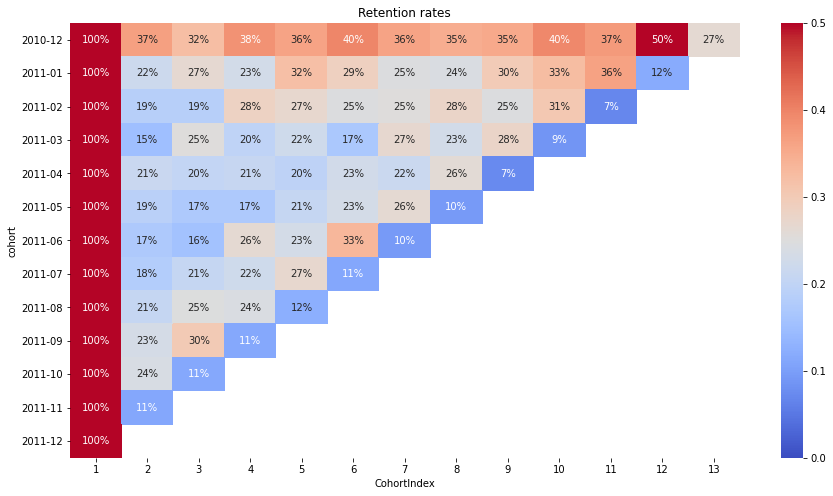

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="coolwarm")
plt.show()

**Revenue by each cohort**

In [ ]:
## Create another cohort table by using revernue per group
grouping = df.groupby(['cohort', 'CohortIndex'])
cohort_data = grouping['Totalprice'].sum()
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='cohort',columns='CohortIndex',values='Totalprice')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort,,,,,,,,,,,,,
2010-12,572713.890,276237.69,233845.37,303119.39,204407.66,336627.50,314162.61,310783.92,331749.220,472813.64,456080.61,513803.59,185803.13
2011-01,293207.350,55149.91,63268.17,71587.40,81114.09,84583.78,70107.40,72689.71,72023.651,111803.90,123882.10,26464.82,NaN
2011-02,158142.070,29043.24,41134.38,48238.86,40147.91,34223.23,49706.63,62450.83,55380.060,64809.45,10600.22,NaN,NaN
2011-03,200069.960,30059.43,59057.51,42816.61,51657.33,40020.81,64919.49,71023.95,71265.830,12868.02,NaN,NaN,NaN
2011-04,122011.491,29452.82,25077.07,24311.47,26314.19,30206.30,28668.98,34228.61,6350.100,NaN,NaN,NaN,NaN
2011-05,124103.780,18682.76,20193.76,19162.17,27861.87,32976.60,33312.91,179251.53,NaN,NaN,NaN,NaN,NaN
2011-06,135742.950,14805.15,14155.40,30961.59,26754.54,42808.25,8227.35,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,74008.751,11789.67,15534.18,17551.47,19512.11,6072.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79756.100,20962.93,35503.90,44541.76,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
